<center><h1 style='color: ##154360; font-size: 70px'>Data Mining</h1></center>
<center><h2 style='color: #FFC300'>Group Project</h2></center>
<center><h3 style='color: #FF5733'>Group AA </h3></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Abdallah Zaher, ?</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Cristina Mousinho, M20190303</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Gabriel Ravi, ?</h5></center>

<b style='color: ##154360;font-size:19px'>Table of contents</b>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#understanding">Business Understanding</a></li>
    <li><a href="#understanding">Data Understanding </a></li>
    <li><a href="#references">References </a></li>
</ul>

<hr>
<b style='color: ##154360;font-size:19px' id="intro"> Introduction</b>

As part of the 2019 Data Mining course for the Master in Data Sience and Advanced Analytics, we were challenged to see ourselves as part of a fictional insurance company located in Portugal. 
We were given a data set to work with, from each we are expected to find different costumers' profiles, to group them and to recommend marketing approachs based on those clusters.

By the end of this report, we should not only have an understanding of how our costumers' behave and how we can group them, but also a way to explain our findings and what could be done with them to the Marketing Department of our company. 

We will begin by understading the business we were asked to imagine ourselves in. After we feel confortable with our knowledge on the subject, we will move on to getting to know the provided data. An analysis of each factor will be conducted. In this first stage, we will most likely face problems with our data. If so, the next step will be to take a closer look at those problems and find solutions for each of them. 

<hr>
<b style='color: ##154360;font-size:19px' id="understanding">Business Understanding </b>

<b style="color:#FF5733">Setting bussiness goals</b>

As stated already, the aim is to deliver insights to the Marketing Departament of the ensurance company. <br>
We know the end goal for a company is always to generate more profit. <br>
So even though our job is to group costumers into clusters, it is very important to keep in mind which clients bring us more profits (higher customer monetary value), and smaller losses (lower claim rates). <br>
Eventually we will want to target new costumers, but the ones we already have may also become interested in new premiums, so we definetly can't forget them!

<b style="color:#FF5733">Setting data mining goals</b>

<p style='color:red; font-size:20px'>" define the criteria for a successful outcome to the project in technical terms—for example, a certain level of predictive accuracy or a propensity-to-purchase profile with a given degree of “lift.” As with business success criteria, it may be necessary to describe these in subjective terms, in which case the person or persons making the subjective judgment should be identified. "</p>

<hr>
<b style='color: ##154360;font-size:19px' id="understanding">Data Understanding </b>

<b style="color:#FF5733">Getting to know the data</b>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model
from copy import deepcopy

In [2]:
insurance_df = pd.read_csv('A2Z_Insurance.csv', index_col = ['Customer Identity']) # Loading the provided data
insurance_df.head() # Checking features and the first 5 rows

,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [3]:
insurance_df.info() # Checking columns and their types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
First Policy´s Year                    10266 non-null float64
Brithday Year                          10279 non-null float64
Educational Degree                     10279 non-null object
Gross Monthly Salary                   10260 non-null float64
Geographic Living Area                 10295 non-null float64
Has Children (Y=1)                     10275 non-null float64
Customer Monetary Value                10296 non-null float64
Claims Rate                            10296 non-null float64
Premiums in LOB: Motor                 10262 non-null float64
Premiums in LOB: Household             10296 non-null float64
Premiums in LOB: Health                10253 non-null float64
Premiums in LOB:  Life                 10192 non-null float64
Premiums in LOB: Work Compensations    10210 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


Even though only one of our columns is categorized as an object, it is important to keep in mind that some of the others are categorical and not numerical variables. To make sure we don't get confused, let's list our variables and their type of measurement scale: <br>

<b> Categorical: nominal </b>
<ul><li>Educational Degree</li>
    <li>Geographic Living Area</li>
    <li>Has Children (Y=1)</li></ul>
    
<b> Numerical: ratio </b>
<ul><li>First Policy´s Year</li>
    <li>Brithday Year</li>
    <li>Gross Monthly Salary</li>
    <li>Claims Rate</li>
    <li>Customer Monetary Value</li>
    <li>Premiums in LOB: Motor</li>
    <li>Premiums in LOB: Household</li>
    <li>Premiums in LOB: Health</li>
    <li>Premiums in LOB: Life</li>
    <li>Premiums in LOB: Work Compensations</li></ul>

In [4]:
nominal = ['Educational Degree','Geographic Living Area','Has Children (Y=1)']
ratio = ['First Policy´s Year','Brithday Year','Gross Monthly Salary','Claims Rate','Customer Monetary Value',
         'Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life',
         'Premiums in LOB: Work Compensations']

<b style="color:#FF5733">Exploring the data and verifying its quality</b>

In [5]:
# Getting information on nominal variables
insurance_df[nominal] = insurance_df[nominal].astype(object)
insurance_df[nominal].describe(include='all')

,Educational Degree,Geographic Living Area,Has Children (Y=1)
count,10279,10295.0,10275.0
unique,4,4.0,2.0
top,3 - BSc/MSc,4.0,1.0
freq,4799,4145.0,7262.0


In [6]:
# Getting information on numerical variables
insurance_df.describe() 

,First Policy´s Year,Brithday Year,Gross Monthly Salary,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10266.000000,10279.000000,10260.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [7]:
insurance_df.isna().sum()

First Policy´s Year                     30
Brithday Year                           17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

Just by a simple overlook of our data, we can already detect some mistakes present in it: the first policy's year takes numbers up to 53784, a year which we are clearly very far away from reaching, and there's at least one costumer born in 1028, which is just impossible.<br>
Also, we have a lot of missing information.<br>
Let's start by solving these problems. 

<hr>
<b style='color: ##154360;font-size:19px' id="preparation">Data Preparation</b>

Since we only have 13 features and all of them can influence our final results, we won't get rid of any of them. 
In this step, we will start by creating new features from the existent ones.<br>

<b style="color:#FF5733">Creating features</b>

In [8]:
insurance_df['Age when doing first policy'] = insurance_df['First Policy´s Year']-insurance_df['Brithday Year']
insurance_df.head()

,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age when doing first policy
Customer Identity,,,,,,,,,,,,,,
1,1985.0,1982.0,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,3.0
2,1981.0,1995.0,2 - High School,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,-14.0
3,1991.0,1970.0,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,21.0
4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,9.0
5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,13.0


In [9]:
insurance_df['Age when doing first policy'].describe() 

count    10252.000000
mean        23.052087
std        512.199471
min        -27.000000
25%          3.000000
50%         18.000000
75%         33.000000
max      51836.000000
Name: Age when doing first policy, dtype: float64

More problems for us: some clients "were" -27 years when doing their first policy, which is obviously an error. <br>
Also, looks like 25% of our clients were 3 or less years old when doing their first policy, which is again totally impossible. 

Let's remove this column for now, in order to not have it influence our missing values count (since it is a direct result of two of our columns)

In [10]:
insurance_df.drop('Age when doing first policy', axis = 1, inplace=True)

<b style="color:#FF5733">Taking care of premiums missing values</b>

In [11]:
print('--------------- Premiums in LOB: Motor')
print(insurance_df.loc[insurance_df['Premiums in LOB: Motor'] == 0])
print('--------------- Premiums in LOB: Health')
print(insurance_df.loc[insurance_df['Premiums in LOB: Health'] == 0])
print('--------------- Premiums in LOB: Life')
print(insurance_df.loc[insurance_df['Premiums in LOB:  Life'] == 0])
print('--------------- Premiums in LOB: Work Compensations')
print(insurance_df.loc[insurance_df['Premiums in LOB: Work Compensations'] == 0])

--------------- Premiums in LOB: Motor
Empty DataFrame
Columns: [First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), Customer Monetary Value, Claims Rate, Premiums in LOB: Motor, Premiums in LOB: Household, Premiums in LOB: Health, Premiums in LOB:  Life, Premiums in LOB: Work Compensations]
Index: []
--------------- Premiums in LOB: Health
Empty DataFrame
Columns: [First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), Customer Monetary Value, Claims Rate, Premiums in LOB: Motor, Premiums in LOB: Household, Premiums in LOB: Health, Premiums in LOB:  Life, Premiums in LOB: Work Compensations]
Index: []
--------------- Premiums in LOB: Life
Empty DataFrame
Columns: [First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), Customer Monetary Value, Claims Rate, Premiums in LOB: Motor, Premi

Even though there's still a possibility all this data is actually missing, it does seem like the missing data in these columns represent unexistence of premium contracts and not lack of information. Because of that, let's fill those non-existenting values with 0. 

In [12]:
insurance_df[['Premiums in LOB: Motor', 'Premiums in LOB: Health',
              'Premiums in LOB:  Life',
              'Premiums in LOB: Work Compensations']] = insurance_df[['Premiums in LOB: Motor', 
                                                                      'Premiums in LOB: Health',
                                                                      'Premiums in LOB:  Life',
                                                                      'Premiums in LOB: Work Compensations']].fillna(value=0)
insurance_df.isna().sum()

First Policy´s Year                    30
Brithday Year                          17
Educational Degree                     17
Gross Monthly Salary                   36
Geographic Living Area                  1
Has Children (Y=1)                     21
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
dtype: int64

<b style="color:#FF5733">Fiding missing values</b>

In [13]:
list_missing_data = {}
l = len([i for i in (insurance_df.isnull().sum(axis=1)/insurance_df.shape[1]).tolist() if i > 0.0])
print(str(round(l/insurance_df.shape[0],3)*100)+"% of rows have values missing")

insurance_df.shape

0.8999999999999999% of rows have values missing


(10296, 13)

<b style="color:#FF5733">Filling missing values</b>

Using only the rows with no missing data, we will take 75% of them and use them to make predictions on the other 25%. <br>

In [24]:
# Randomizing the two sets 
insurance_df_sets = insurance_df.copy(deep=True)
insurance_df_sets = insurance_df_sets.dropna()
insurance_df_trainingset = insurance_df_sets.sample(frac = 0.75)
print(insurance_df_trainingset.index.tolist())

[630, 6091, 8207, 9233, 10139, 1504, 8801, 3207, 6780, 2409, 7683, 5725, 8047, 2727, 9131, 5091, 1301, 8201, 9648, 335, 9870, 8150, 8600, 9246, 3268, 9197, 9451, 4762, 3582, 5166, 6029, 8060, 3224, 241, 8800, 401, 8880, 1863, 4120, 5620, 3765, 187, 747, 2684, 4676, 1262, 2971, 4663, 7368, 2974, 9700, 8580, 243, 6591, 4386, 699, 6805, 1855, 8072, 2480, 8348, 4077, 7738, 6345, 5866, 5873, 1157, 4849, 8943, 7673, 8312, 4061, 5932, 2432, 8253, 1773, 4960, 2805, 9718, 3706, 1316, 6018, 1467, 3674, 5497, 7993, 8776, 129, 944, 1826, 3940, 188, 2659, 1274, 4256, 5110, 6529, 7486, 5017, 7406, 2020, 6758, 8833, 218, 380, 6557, 9855, 2365, 1636, 232, 6697, 3432, 6301, 4716, 6482, 5805, 6825, 4726, 3805, 7025, 861, 2883, 6303, 658, 1811, 5488, 5231, 6178, 7877, 3784, 2481, 10285, 3436, 5788, 9902, 3222, 4750, 4742, 9966, 907, 2934, 8876, 2189, 4592, 8015, 5814, 9532, 5419, 5318, 3120, 261, 3925, 8803, 10131, 3744, 5161, 4368, 3663, 1800, 5610, 1711, 5657, 5160, 6523, 4916, 5455, 2558, 5916, 6021, 

## Automatically fill in with a measure of central tendency (i.e. mean, median, mode);

In [15]:
insurance_df_ct = insurance_df.copy(deep=True)
insurance_df_ct[ratio] = insurance_df_ct[ratio].fillna(insurance_df[ratio].mean())

In [16]:
insurance_df_ct[nominal] = insurance_df_ct[nominal].fillna(insurance_df[nominal].mode().iloc[0])

## To fill in with values from similar individuals (nearest neighbours);

In [17]:
insurance_df_nn = insurance_df.sort_values(by=insurance_df.columns.tolist()).fillna(method = 'ffill')

## Predictive model (linear regression, multiple linear regression);

In [18]:
null_data = {}
to_check = []

for col in insurance_df[ratio].columns.tolist():
    null_data[col] = insurance_df[insurance_df[col].isnull()].index.tolist()
    to_check += insurance_df[insurance_df[col].isnull()].index.tolist()


to_check = list(dict.fromkeys([i for i in to_check if to_check.count(i) >= 2])) # Rows with more than one value missing

for col in null_data:
    for i in range (len(null_data[col])-1,-1, -1):
        if null_data[col][i] in to_check:
            null_data[col].remove(null_data[col][i])

In [19]:
X = [i for i in null_data.keys() if len(null_data[i])>0]
dict_models = {}

for i in range(0,len(X)):
    dict_models[X[i]] = deepcopy(ratio)
    dict_models[X[i]].remove(X[i])

aux_df = insurance_df.dropna()
lm = linear_model.LinearRegression()
predictions = {}

for mod in dict_models:
    x = pd.DataFrame(aux_df[dict_models[mod]])
    y = pd.DataFrame(aux_df[mod])
    model = lm.fit(x,y)
    pred = insurance_df[dict_models[mod]].loc[null_data[mod]]
    predictions[mod] = lm.predict(pred).tolist()


insurance_df_mrm = insurance_df.copy(deep=True)

for prediction in predictions:
    for i in range(0,len(predictions[prediction])):
        insurance_df_mrm.loc[null_data[prediction][i],prediction] = round(predictions[prediction][i][0],1)

        
insurance_df_mrm['Age when doing first policy'] = insurance_df_mrm['First Policy´s Year']-insurance_df_mrm['Brithday Year']
insurance_df_mrm[ratio] = insurance_df_mrm[ratio].fillna(insurance_df_mrm.mean())
insurance_df_mrm[nominal] = insurance_df_mrm[nominal].fillna(insurance_df_mrm.mode().iloc[0])
insurance_df_mrm.describe()

,First Policy´s Year,Brithday Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age when doing first policy
count,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10291.000000
mean,1991.066203,1968.006538,2506.580581,2.709984,0.707362,177.892605,0.742772,299.478024,210.431192,170.864246,41.432996,40.932733,23.058109
std,510.522497,19.698314,1156.224538,1.266293,0.454996,1945.811505,2.916964,212.265950,352.595984,295.993236,47.425261,51.435347,511.229247
min,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,-27.000000
25%,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.260000,49.450000,110.910000,9.890000,10.000000,3.000000
50%,1986.000000,1968.000000,2502.000000,3.000000,1.000000,186.870000,0.720000,298.390000,132.800000,162.030000,25.450000,25.560000,18.000000
75%,1992.000000,1983.000000,3290.000000,4.000000,1.000000,399.777500,0.980000,407.520000,290.050000,218.957500,57.010000,56.010000,33.000000
max,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000,51836.000000


<b style="color:#FF5733">Fiding outliers</b>

In [20]:
ratio.append('Age when doing first policy') # Age when doing first policy is numerical (ratio)

ValueError: Could not interpret input 'Age when doing first policy'

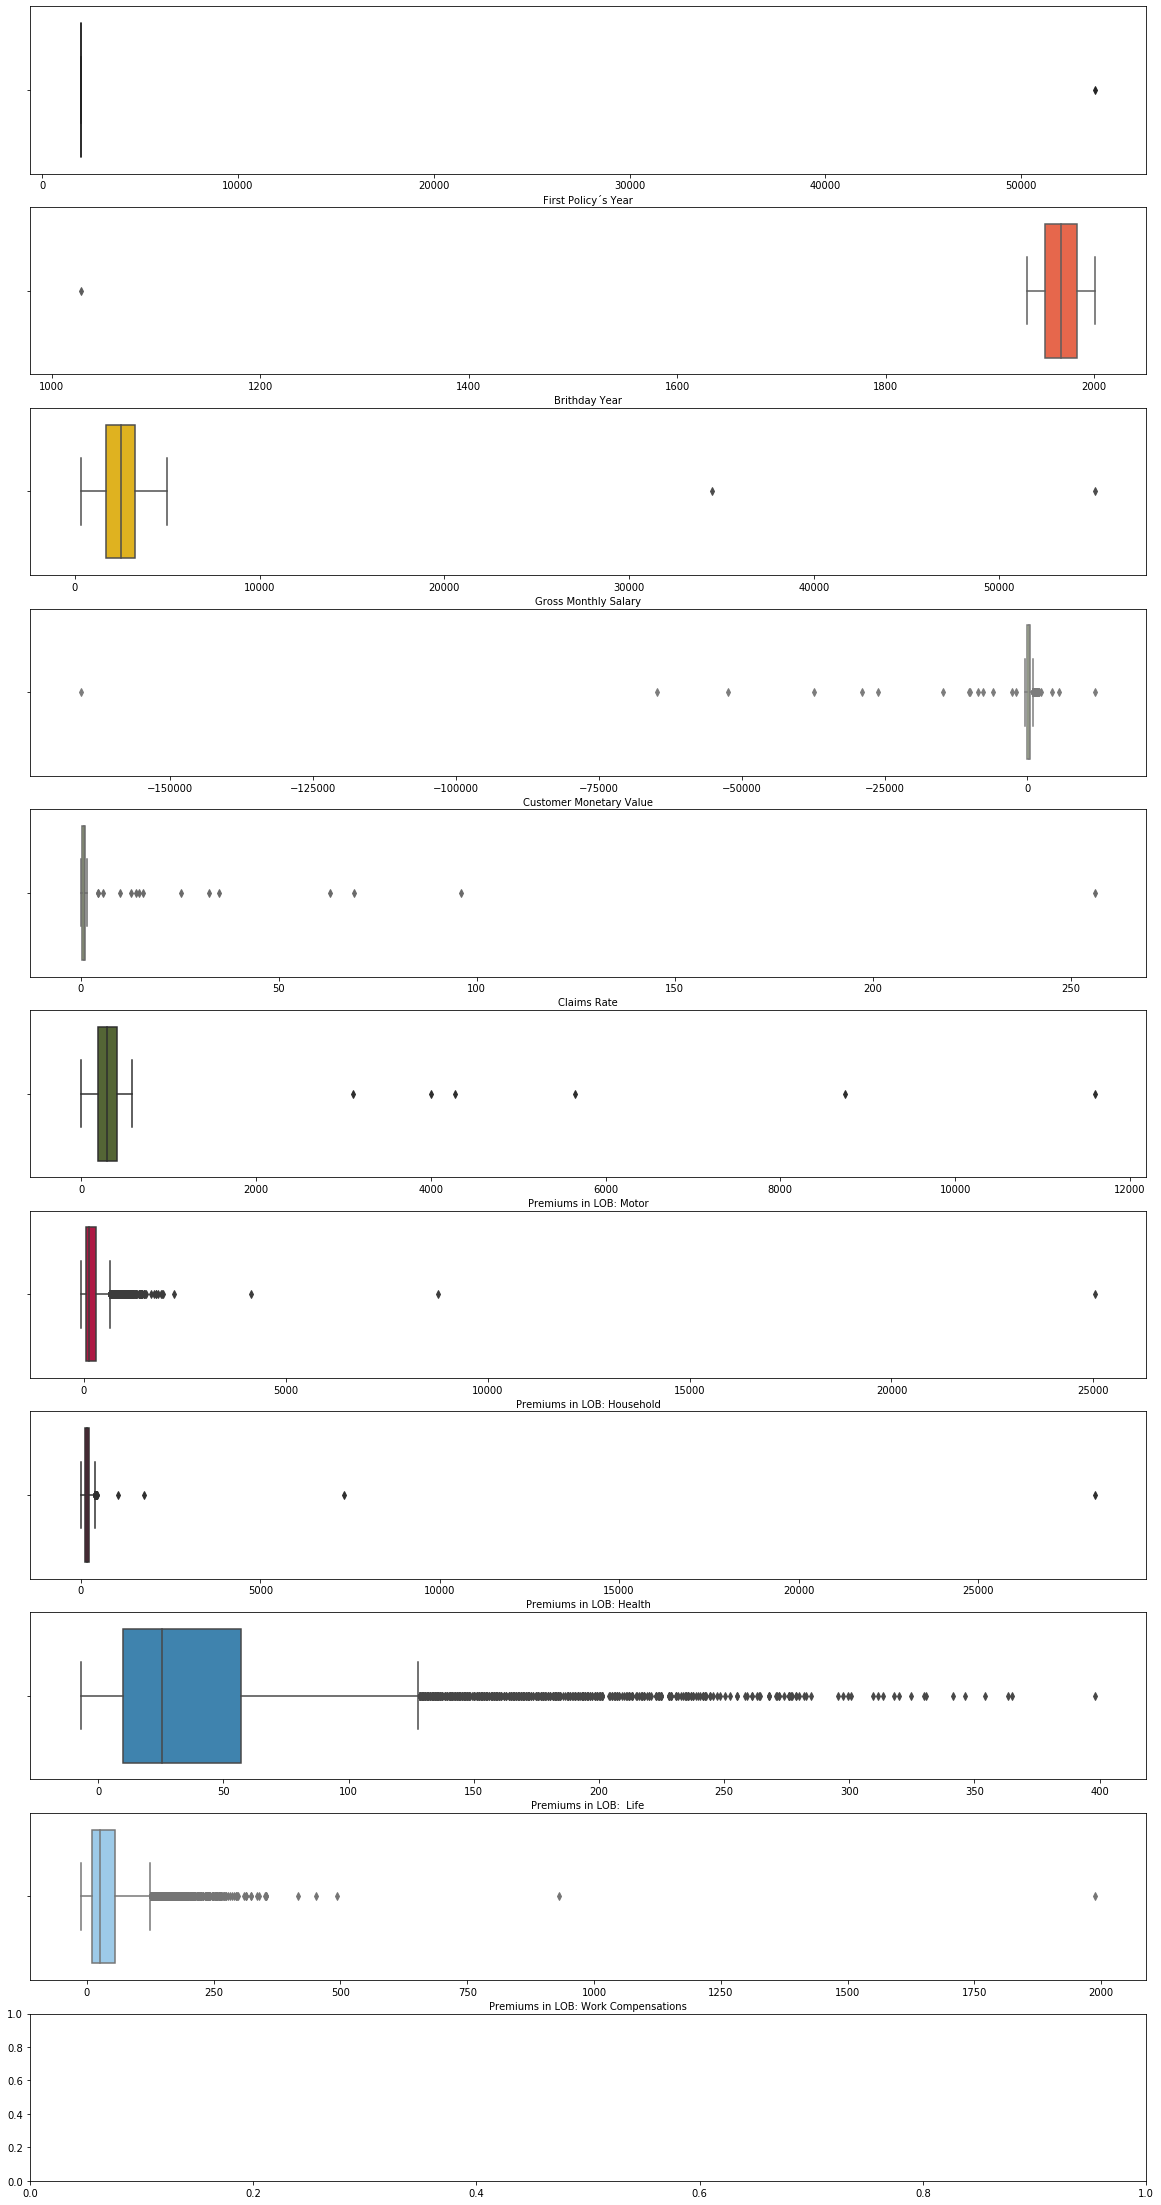

In [21]:
fig = plt.figure(figsize=(20,40))
grid = plt.GridSpec(ncols=1, nrows=11)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[2, 0])
ax4 = fig.add_subplot(grid[3, 0])
ax5 = fig.add_subplot(grid[4, 0])
ax6 = fig.add_subplot(grid[5, 0])
ax7 = fig.add_subplot(grid[6, 0])
ax8 = fig.add_subplot(grid[7, 0])
ax9 = fig.add_subplot(grid[8, 0])
ax10 = fig.add_subplot(grid[9, 0])
ax11 = fig.add_subplot(grid[10, 0])

sns.boxplot(x='First Policy´s Year', data=insurance_df, whis = 1.5, color= '#154360', ax=ax1)
sns.boxplot(x='Brithday Year', data=insurance_df, whis = 1.5, color= '#FF5733', ax=ax2)
sns.boxplot(x='Gross Monthly Salary', data=insurance_df, whis = 1.5, color= '#FFC300', ax=ax3)
sns.boxplot(x='Customer Monetary Value', data=insurance_df, whis = 1.5, color= '#DAF7A6', ax=ax4)
sns.boxplot(x='Claims Rate', data=insurance_df, whis = 1.5, color= '#BEE080', ax=ax5)
sns.boxplot(x='Premiums in LOB: Motor', data=insurance_df, whis = 1.5, color= '#566D2D', ax=ax6)
sns.boxplot(x='Premiums in LOB: Household', data=insurance_df, whis = 1.5, color= '#C70039', ax=ax7)
sns.boxplot(x='Premiums in LOB: Health', data=insurance_df, whis = 1.5, color= '#900C3F', ax=ax8)
sns.boxplot(x='Premiums in LOB:  Life', data=insurance_df, whis = 1.5, color= '#2D87C0', ax=ax9)
sns.boxplot(x='Premiums in LOB: Work Compensations', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax10)
sns.boxplot(x='Age when doing first policy', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax11);

As expected, the boxplots of birthday years and first policy´s years show a couple of outliers. Since a client's age when doing their first policy depends on these two factors, its boxplot also comes with outliers. <br>
Now for the rest of the boxplots, outliers are a little harder to conclude on. For example, looking at the premium in LOB: Health, the amount of outliers is huge, and that's normal, since the premiums depend on a lot of diferent variables. <br>
As for the gross monetary value... Who's to say we don't have a client that earns more than 5000 a month? We can't be sure, and although that value is unusual, it's definetly possible. 
Let's consider the logarithm of these variables and re-check their bloxplots after that transformation.

In [ ]:
def to_log(dataframe,variable):
    min_val = dataframe[variable].min()
    newdataframe = dataframe # Creating a copy so we don't change the original
    if min_val > 1: # Meaning no complications in doing the logarithm
        newdataframe[variable] = np.log(newdataframe[variable])
    else:
        newdataframe[variable] = newdataframe[variable] + round(min_val+1,1)
        newdataframe[variable] = np.log(newdataframe[variable])
        
    return newdataframe
        
    
to_log(insurance_df,'Gross Monthly Salary')
# sns.boxplot(x='Gross Monthly Salary', data=insurance_df, whis = 1.5, color= '#FFC300', ax=ax3)
# sns.boxplot(x='Customer Monetary Value', data=insurance_df, whis = 1.5, color= '#DAF7A6', ax=ax4)
# sns.boxplot(x='Claims Rate', data=insurance_df, whis = 1.5, color= '#BEE080', ax=ax5
# sns.boxplot(x='Premiums in LOB: Household', data=insurance_df, whis = 1.5, color= '#C70039', ax=ax7)
# sns.boxplot(x='Premiums in LOB: Health', data=insurance_df, whis = 1.5, color= '#900C3F', ax=ax8)
# sns.boxplot(x='Premiums in LOB:  Life', data=insurance_df, whis = 1.5, color= '#2D87C0', ax=ax9)
# sns.boxplot(x='Premiums in LOB: Work Compensations', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax10);

## 2. Methodology


In [ ]:
# I'll add something useful here (GR)


## 3. Univariate Analysis

In [ ]:
# Chaging styles
colors = ["#154360","#FF5733","#FFC300","#DAF7A6"]
sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')

   ##### Educational Degree

In [ ]:
insurance_df['Educational Degree'].value_counts().sum() #No NA's
insurance_df['Educational Degree'].value_counts()

##### Has Children

In [ ]:
insurance_df['Has Children (Y=1)'].value_counts().sum() #No NA's
insurance_df['Has Children (Y=1)'].value_counts()

#### Geographic Living Area

In [ ]:
insurance_df['Geographic Living Area'].value_counts().sum() #No NA's
insurance_df['Geographic Living Area'].value_counts()

In [ ]:
fig = plt.figure(figsize=(16,3))
grid = plt.GridSpec(ncols=3, nrows=1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0, 2])
sns.countplot(x='Educational Degree', data=insurance_df, ax=ax1)
sns.countplot(x='Has Children (Y=1)', data=insurance_df,ax=ax2)
sns.countplot(x='Geographic Living Area', data=insurance_df, ax=ax3)

#### Fidelity

In [ ]:
insurance_df['Fidelity'] = 2016 - insurance_df['First Policy´s Year']
insurance_df['Fidelity'] 
insurance_df['Fidelity'].value_counts() #There is one value equal to -51768.0

In [ ]:
insurance_df = insurance_df[insurance_df['Fidelity'] > 0 ] #Removing the dirty data
insurance_df['Fidelity'].value_counts()

In [ ]:
sns.distplot(insurance_df['Fidelity']) #Lets create a new cluster for Fidelity

In [ ]:
#def transf(db):
        
 #   if insurance_df['Fidelity'] < 25:
  #        return "Less25"
   # elif 26 < insurance_df['Fidelity'] < 35:
    #        return "Betweenn45"           
    #else:
     #     return "Above45" 
        
#transf(insurance_df['Fidelity'])

#### BirthDate

In [ ]:
insurance_df['Age'] = 2016 - insurance_df['Brithday Year'] 
insurance_df['Age'].max
insurance_df['Age'].value_counts()
insurance_df = insurance_df[insurance_df['Age'] < 100 ] 
insurance_df['Age'].value_counts()

In [ ]:
#Clustering the age
def f(row):
    if insurance_df['Age'] < 30:
        val = "Vem"
    elif insurance_df['Age'] > 31 & insurance_df['Age'] < 45:
        val = "Tranquilo"
    else:
        val = "Papai"
    return val 




In [ ]:
sns.distplot(insurance_df['Age'],bins=30,kde=False,color='RoyalBlue')

#### Gross Monthly Salary

In [ ]:
insurance_df['Gross Monthly Salary']
insurance_df['Gross Monthly Salary'].describe()
sum(insurance_df['Gross Monthly Salary'].isnull()) # 34 NA's
insurance_df['Gross Monthly Salary'].describe()
insurance_df['Gross Monthly Salary'].fillna(0)

In [ ]:
sns.distplot(insurance_df['Gross Monthly Salary'], kde=False,color='red', bins=30) 

#### Premiums (Euros) 

In [ ]:
insurance_df.info()
insurance_df['Premiums in LOB: Motor']
insurance_df['Premiums in LOB: Household']
insurance_df['Premiums in LOB: Health']
insurance_df['Premiums in LOB:  Life']
insurance_df['Premiums in LOB: Work Compensations']

## 4. Multivariate Analysis

In [ ]:
#Let's understand what is happening in our database

In [ ]:
insurance_df.info()
insurance_df['Premiums in LOB: Motor']
insurance_df['Premiums in LOB: Household']
insurance_df['Premiums in LOB: Health']
insurance_df['Premiums in LOB:  Life']
insurance_df['Premiums in LOB: Work Compensations']


In [ ]:
insurance_df[['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life',
     'Premiums in LOB: Work Compensations']].corr()
#Low correlations but we can consider a small correlation between 
#"Premiums in LOB: Motor" and Premiums in LOB: Work Compensations

#### Let's study the Main variables in each one of the main categories

## 5. Conclusion

<hr>
<b style='color: ##154360;font-size:19px' id="references">References</b><br>

<ul>
    <li>Smart Vision Europe. <i>What is the CRISP-DM methodology? </i> Available from: <a href="https://www.sv-europe.com/crisp-dm-methodology/" target="_blank">https://www.sv-europe.com/crisp-dm-methodology/</a></li>
    <li>website. <i>title</i>. Available from: <a href="url" target="_blank">url</a></li>
</ul>